In [4]:
import numpy as np
S0 = 10
B0 = 10
S1 = np.array((20, 5))
B1 = np.array((11, 11))
M0 = np.array((S0, B0))
M1 = np.array((S1, B1)).T
P = np.array((0.5, 0.5))

#vettore del rendimento dell'asset rischioso
rS = S1 / S0 - 1
rS

array([ 1. , -0.5])

In [5]:
#Vettore del rendimento dell'asset senza rischio
rB = B1 / B0 - 1
rB

array([0.1, 0.1])

In [6]:
#funzione di rendimento atteso
def mu(rX):
  return np.dot(P, rX)

#rendimenti attesi degli asset negoziati
mu(rS)

0.25

In [7]:
#rendimenti attesi degli asset negoziati
mu(rB)

0.10000000000000009

In [8]:
#matrice dei rendimenti per gli asset negoziati
rM = M1 / M0 - 1
rM

array([[ 1. ,  0.1],
       [-0.5,  0.1]])

In [9]:
#vettore del rendimento atteso
mu(rM)

array([0.25, 0.1 ])

In [10]:
#funzione della varianza
def var(rX):
  return ((rX - mu(rX))**2).mean()

var(rS)

0.5625

In [11]:
var(rB)

0.0

In [12]:
#funzione della volatilità
def sigma(rX):
  return np.sqrt(var(rX))

sigma(rS)

0.75

In [13]:
sigma(rB)

0.0

In [14]:
#la matrice di covarianza
np.cov(rM.T, aweights=P, ddof=0)

array([[0.5625, 0.    ],
       [0.    , 0.    ]])

In [15]:
phi = np.array((0.5, 0.5))

#il rendimento atteso del portafoglio
def mu_phi(phi):
  return np.dot(phi, mu(rM))

mu_phi(phi)

0.17500000000000004

In [16]:
#la varianza attesa del portafoglio
def var_phi(phi):
  cv = np.cov(rM.T, aweights=P, ddof=0)
  return np.dot(phi, np.dot(cv, phi))
var_phi(phi)

0.140625

In [17]:
#la volatilità attesa del portafoglio
def sigma_phi(phi):
  return var_phi(phi) ** 0.5

sigma_phi(phi)

0.375

In [18]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

#composizioni casuali di portafoglio, normalizzate a 1
phi_mcs = np.random.random((2, 200))

phi_mcs = (phi_mcs / phi_mcs.sum(axis=0)).T

#volatilità e rendimento attesi del portafoglio per le composizioni casuali
mcs = np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs])

<ipython-input-18-6b09eb6ea2f7>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'expected return')

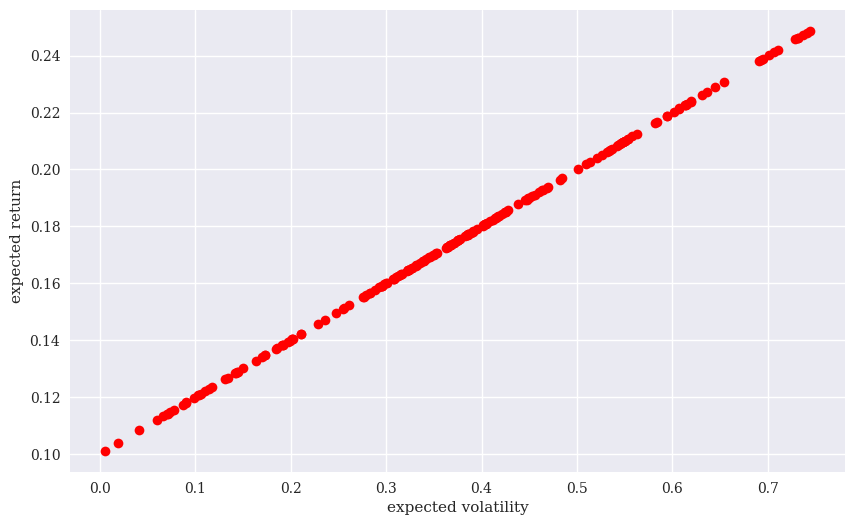

In [19]:
plt.figure(figsize=(10,6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return')

In [20]:
#nuove misure di probabilità per i tre stati
P = np.ones(3)/3
P

array([0.33333333, 0.33333333, 0.33333333])

In [21]:
S0 = 10
S1 = np.array((20, 10, 5))
T0 = 10
T1 = np.array((1, 12, 13))

M0 = np.array((S0, T0))
M0

array([10, 10])

In [22]:
M1 = np.array((S1, T1)).T
M1

array([[20,  1],
       [10, 12],
       [ 5, 13]])

In [23]:
rM = M1 / M0 -1
rM

array([[ 1. , -0.9],
       [ 0. ,  0.2],
       [-0.5,  0.3]])

Text(0, 0.5, 'expected return')

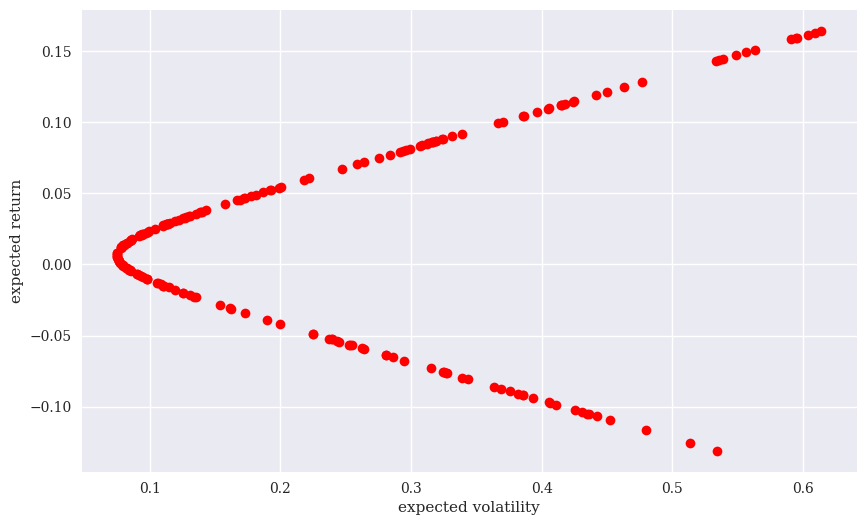

In [24]:
mcs = np.array([(sigma_phi(phi), mu_phi(phi)) for phi in phi_mcs])
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro')
plt.xlabel('expected volatility')
plt.ylabel('expected return')

In [25]:
from scipy.optimize import minimize
cons = {'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1}
bnds = ((0, 1), (0, 1))

#riduce al minimo la volatilità attesa del portafoglio
min_var = minimize(sigma_phi, (0.5, 0.5), constraints=cons, bounds=bnds)
min_var

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.07481322946903253
       x: [ 4.651e-01  5.349e-01]
     nit: 4
     jac: [ 7.427e-02  7.529e-02]
    nfev: 13
    njev: 4

In [26]:
#definisce la funzione Sharpe ratio, ipotizzando un short rate di 0
def sharpe(phi):
  return mu_phi(phi) / sigma_phi(phi)

#massimizza lo Sharpe ratio minimizzando il suo valore negativo
max_sharpe = minimize(lambda phi: -sharpe(phi), (0.5, 0.5),
                        constraints=cons, bounds=bnds)
max_sharpe

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.27216540990230487
       x: [ 6.673e-01  3.327e-01]
     nit: 9
     jac: [ 1.205e-04 -2.417e-04]
    nfev: 29
    njev: 9

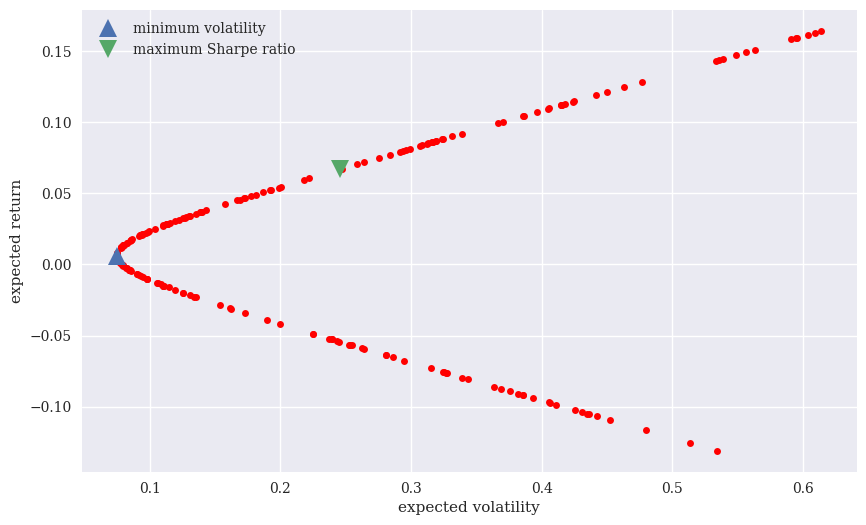

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(mcs[:, 0], mcs[:, 1], 'ro', ms=5)
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),
                  '^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),
                  'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();

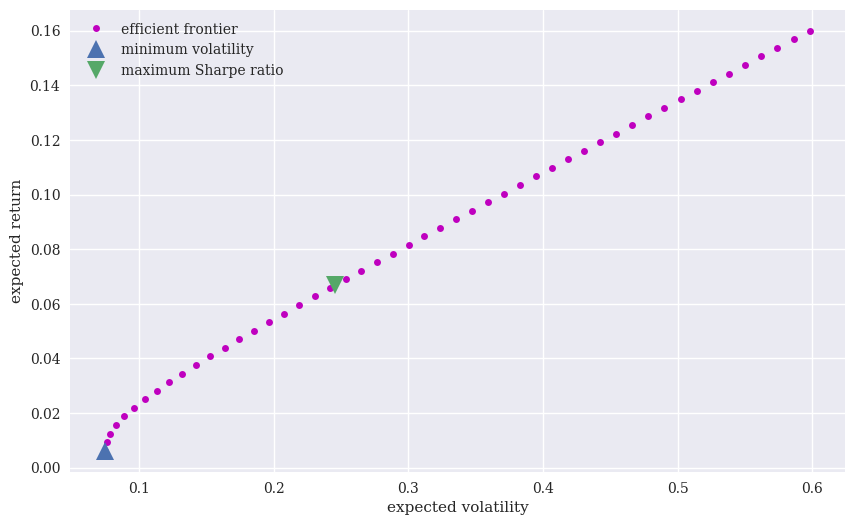

In [28]:
#il nuovo vincolo fissa un livello obiettivo per il rendimento atteso
cons = [{'type': 'eq', 'fun': lambda phi: np.sum(phi) - 1},
                {'type': 'eq', 'fun': lambda phi: mu_phi(phi) - target}]

bnds = ((0, 1), (0, 1))

#genera l'insieme di target dei rendimenti previsti 
targets = np.linspace(mu_phi(min_var['x']), 0.16)

#deriva il portafoglio a volatilità minima dato un rendimento atteso target
frontier = []
for target in targets:
    phi_eff = minimize(sigma_phi, (0.5, 0.5), constraints=cons, bounds=bnds)['x']
    frontier.append((sigma_phi(phi_eff), mu_phi(phi_eff)))
frontier = np.array(frontier)

plt.figure(figsize=(10, 6))
plt.plot(frontier[:, 0], frontier[:, 1], 'mo', ms=5,
        label='efficient frontier')
plt.plot(sigma_phi(min_var['x']), mu_phi(min_var['x']),
        '^', ms=12.5, label='minimum volatility')
plt.plot(sigma_phi(max_sharpe['x']), mu_phi(max_sharpe['x']),
        'v', ms=12.5, label='maximum Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend();